# A method for determining electrification of small fishing vessels

### Definition of input parameters

#### Ship parameters

In [87]:
LENGTH = 11.91  # meters [m]
BEAM = 4.0  # meters [m]

#### Operational parameters

In [88]:
DISTANCE_TRANSIT_OUT = 8.35  # nautical mile [nm]
DISTANCE_FISHING = 17.5  # nautical mile [nm]
DISTANCE_TRANSIT_IN = 8.35  # nautical mile [nm]

TRANSIT_SPEED = 7.0  # knots [kn]

OPERATIONAL_PROFILE = "pots"
NUMBER_OF_POTS = 10

## The method - DO NOT EDIT

### Creation of speed profile

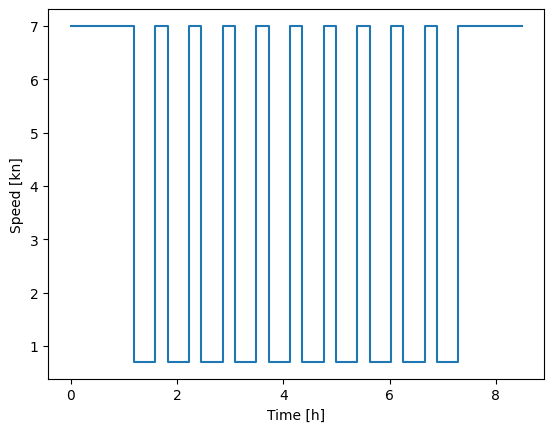

In [89]:
from py_fish.operation import custom_speed_profile, distance_from_profile
from py_fish.plotting import plot_speed_profile
import matplotlib.pyplot as plt

speed_profile = custom_speed_profile(
    distance_out=DISTANCE_TRANSIT_OUT,
    distance_fishing=DISTANCE_FISHING,
    distance_in=DISTANCE_TRANSIT_IN,
    speed_out=TRANSIT_SPEED,
    speed_fishing=TRANSIT_SPEED,
    speed_in=TRANSIT_SPEED,
    time_per_pot=0.4,
    number_of_pots=NUMBER_OF_POTS,
)

time_total = speed_profile[-1, 0] - speed_profile[0, 0]

fig, ax = plt.subplots()
plot_speed_profile(speed_profile=speed_profile, ax=ax)

### Calculation of energy consumption

In [90]:
from py_fish.loads import (
    calculate_propulsion_power,
    calculate_hydraulics_energy,
    calculate_dc_energy,
)
from py_fish.operation import total_consumption_from_profile
from py_fish.utils import components_to_profile

propulsion_power_profile = components_to_profile(
    speed_profile[:, 0],
    calculate_propulsion_power(length=LENGTH, beam=BEAM, speeds=speed_profile[:, 1]),
)

peak_power = calculate_propulsion_power(
    length=LENGTH, beam=BEAM, speeds=[TRANSIT_SPEED]
)[0]

propulsion_energy = total_consumption_from_profile(propulsion_power_profile)
hydraulics_energy = calculate_hydraulics_energy(
    hours_fishing=time_total
    - (DISTANCE_TRANSIT_IN + DISTANCE_TRANSIT_OUT) / TRANSIT_SPEED
)
dc_energy = calculate_dc_energy(hours_total=time_total)

total_energy = propulsion_energy + hydraulics_energy + dc_energy

print(f"Total useful energy: {total_energy:.1f} kWh")
print(f"Total time: {time_total:.2f} h")
print(f"Peak power: {peak_power:.2f} kW")

Total useful energy: 141.2 kWh
Total time: 8.49 h
Peak power: 27.55 kW


In [91]:
MOTOR_EFFICIENCY = 0.96
ELECTRONICS_EFFICIENCY = 0.9
BATTERY_EFFICIENCY = 0.96

BATTERY_TO_SHAFT_EFFICIENCY = (
    MOTOR_EFFICIENCY * ELECTRONICS_EFFICIENCY * BATTERY_EFFICIENCY
)

total_energy_battery = total_energy / BATTERY_TO_SHAFT_EFFICIENCY

SEAMARGIN = 1.2
total_energy_battery = total_energy_battery * SEAMARGIN

DOD = 0.8

total_energy_battery = total_energy_battery / DOD
print(f"Rated battery capacity: {total_energy_battery:.1f} kWh")

OPTIMAL_OPERATIONAL_POWER_FRACTION = 0.75
rated_motor_power = peak_power / OPTIMAL_OPERATIONAL_POWER_FRACTION
print(f"Rated motor power: {rated_motor_power:.2f} kW")

Rated battery capacity: 255.4 kWh
Rated motor power: 36.73 kW
